In [74]:
import os
from tqdm import tqdm
from glob import glob

import numpy as np
import pandas as pd

from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

import warnings
warnings.filterwarnings("ignore")

In [75]:
df = pd.read_parquet("./processed_dfs/coin_features_df_extract_features_7_1.parquet")

feats = ['ring_1_s_kurtosis', 'ring_2_v_kurtosis', 'ring_3_h_std', 'ring_2_s_std',
         's_std', 'ring_4_magnitude_median', 'ring_3_s_kurtosis']

df = df[feats + ['img_type']]
df.shape

(3093, 8)

In [80]:
def get_max_bin_edge(df, class_label, col):
    hist_cents, bin_edges_cents = np.histogram(df[df['img_type'] == class_label][col], density = True, bins = 20)
    return bin_edges_cents[np.where(hist_cents == hist_cents.max())[0][0]]

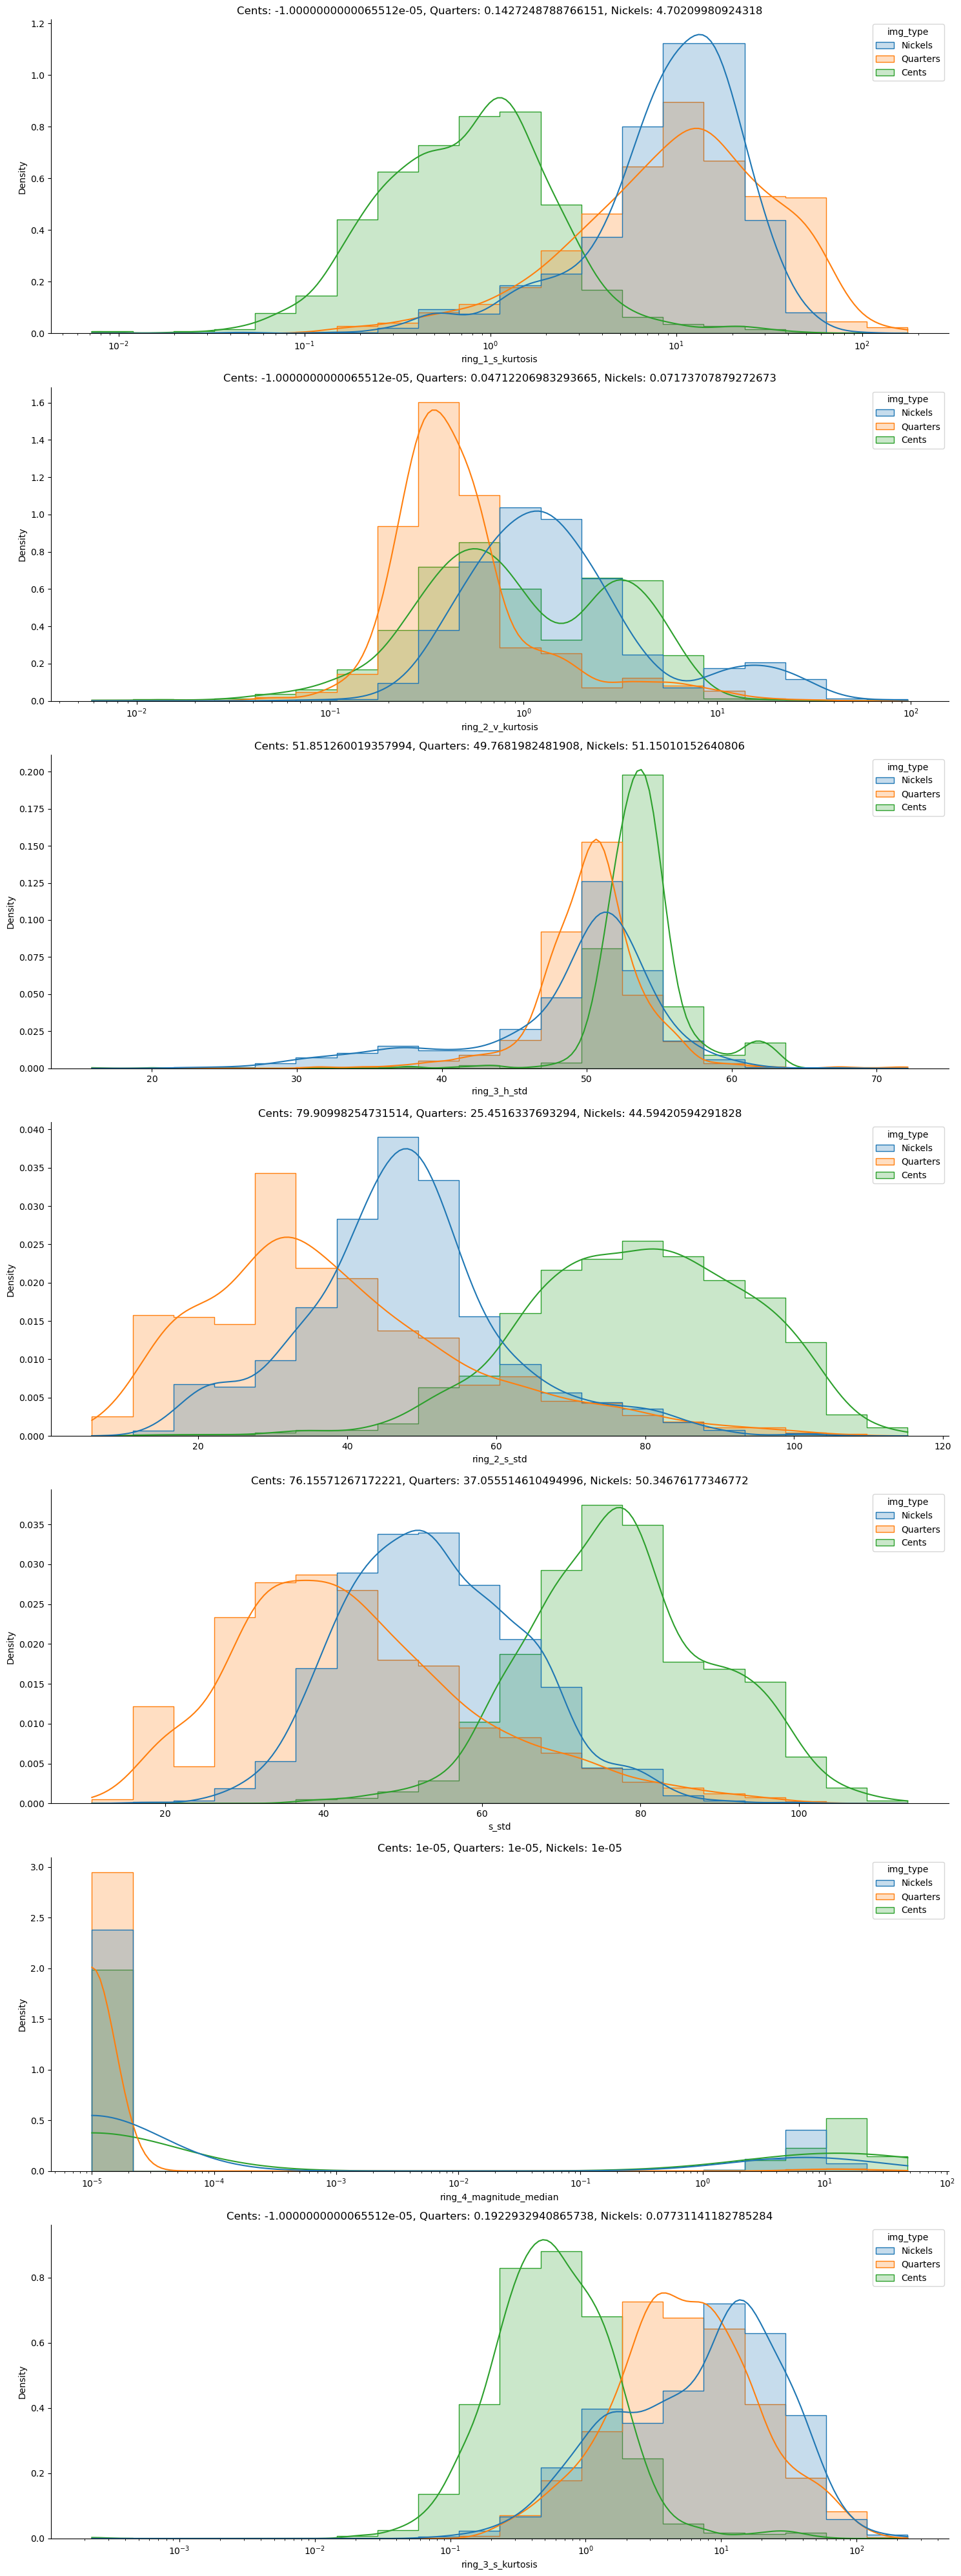

In [83]:
fig, axs = plt.subplots(7, 1, figsize = (15, 40))

for i, col in enumerate(feats):
    ax = axs[i]

    if 'std' in col:
        max_bin_edge_cents = get_max_bin_edge(df, "Cents", col)
        max_bin_edge_quarters = get_max_bin_edge(df, "Quarters", col)
        max_bin_edge_nickels = get_max_bin_edge(df, "Nickels", col)

        sns.histplot(data = df, 
                    x = col, 
                    hue = "img_type",
                    common_norm = False,
                    element = 'step',
                    stat = 'density',
                    bins = 20, 
                    kde = True,
                    ax = ax)
    else:
        temp = df.copy()
        temp[col] = temp[col] + abs(temp[col].min() + 10e-6)

        max_bin_edge_cents = get_max_bin_edge(temp, "Cents", col)
        max_bin_edge_quarters = get_max_bin_edge(temp, "Quarters", col)
        max_bin_edge_nickels = get_max_bin_edge(temp, "Nickels", col)

        sns.histplot(data = temp,  
                    x = col, 
                    hue = "img_type",
                    common_norm = False,
                    log_scale = True,
                    element = 'step',
                    stat = 'density',
                    bins = 20, 
                    kde = True,
                    ax = ax)
        
        del temp
        
    ax.set_title(f"Cents: {max_bin_edge_cents}, Quarters: {max_bin_edge_quarters}, Nickels: {max_bin_edge_nickels}")
    ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

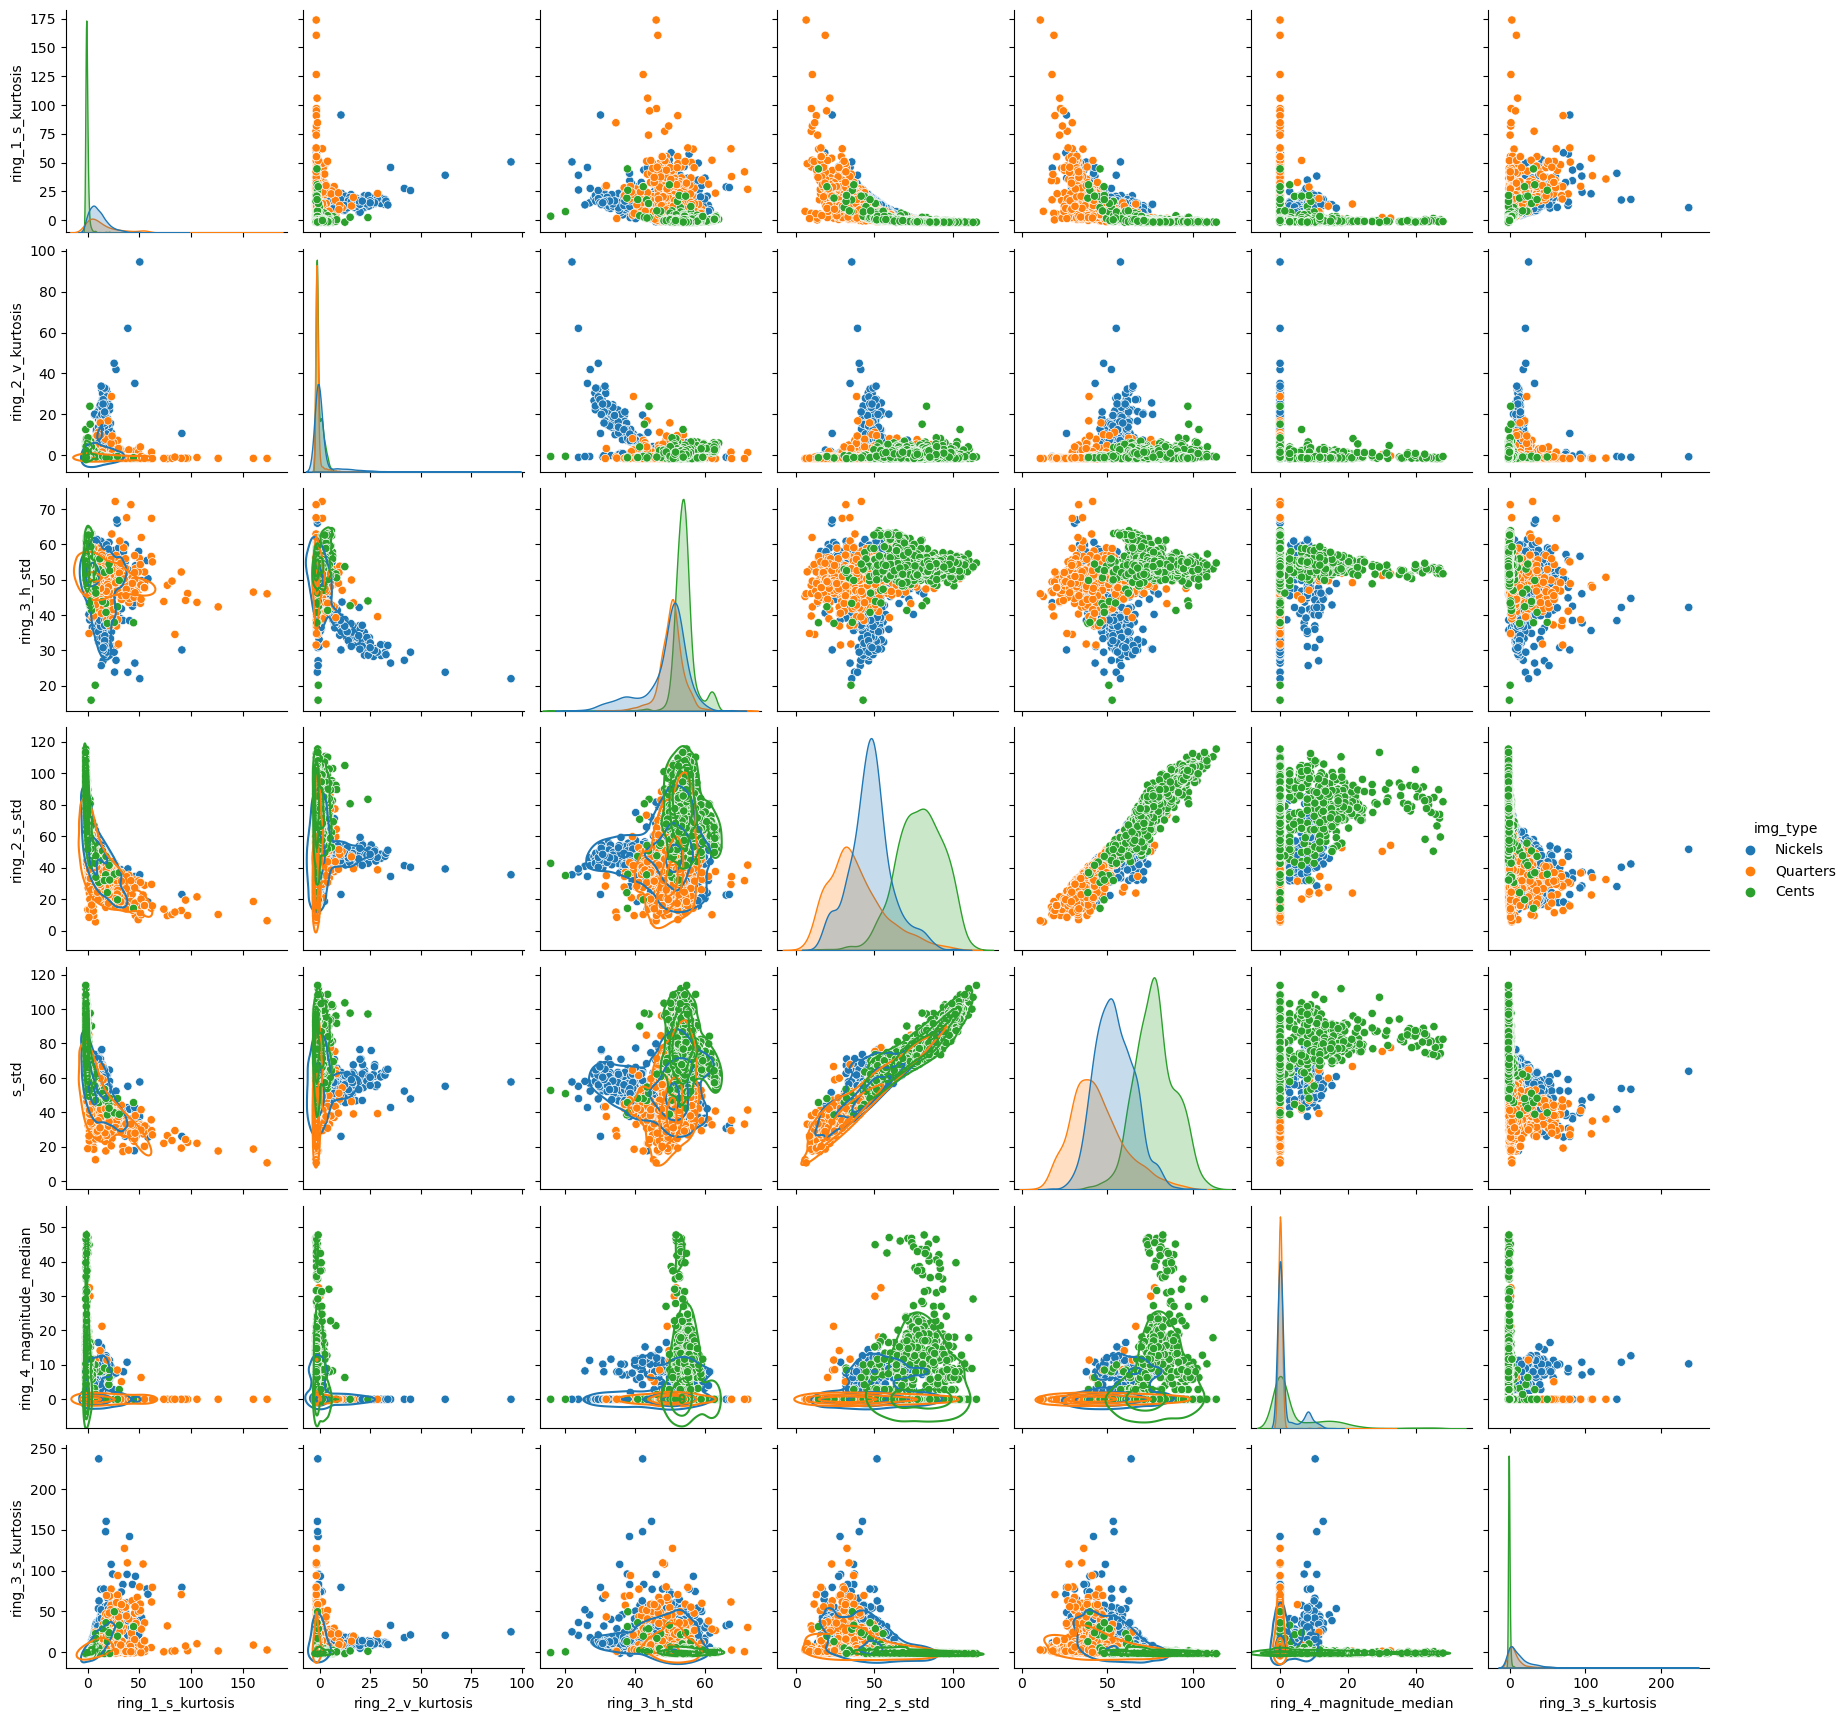

In [14]:
g = sns.pairplot(df, hue = "img_type", diag_kind = "kde")
g.map_lower(sns.kdeplot, levels = 4, color = ".2")

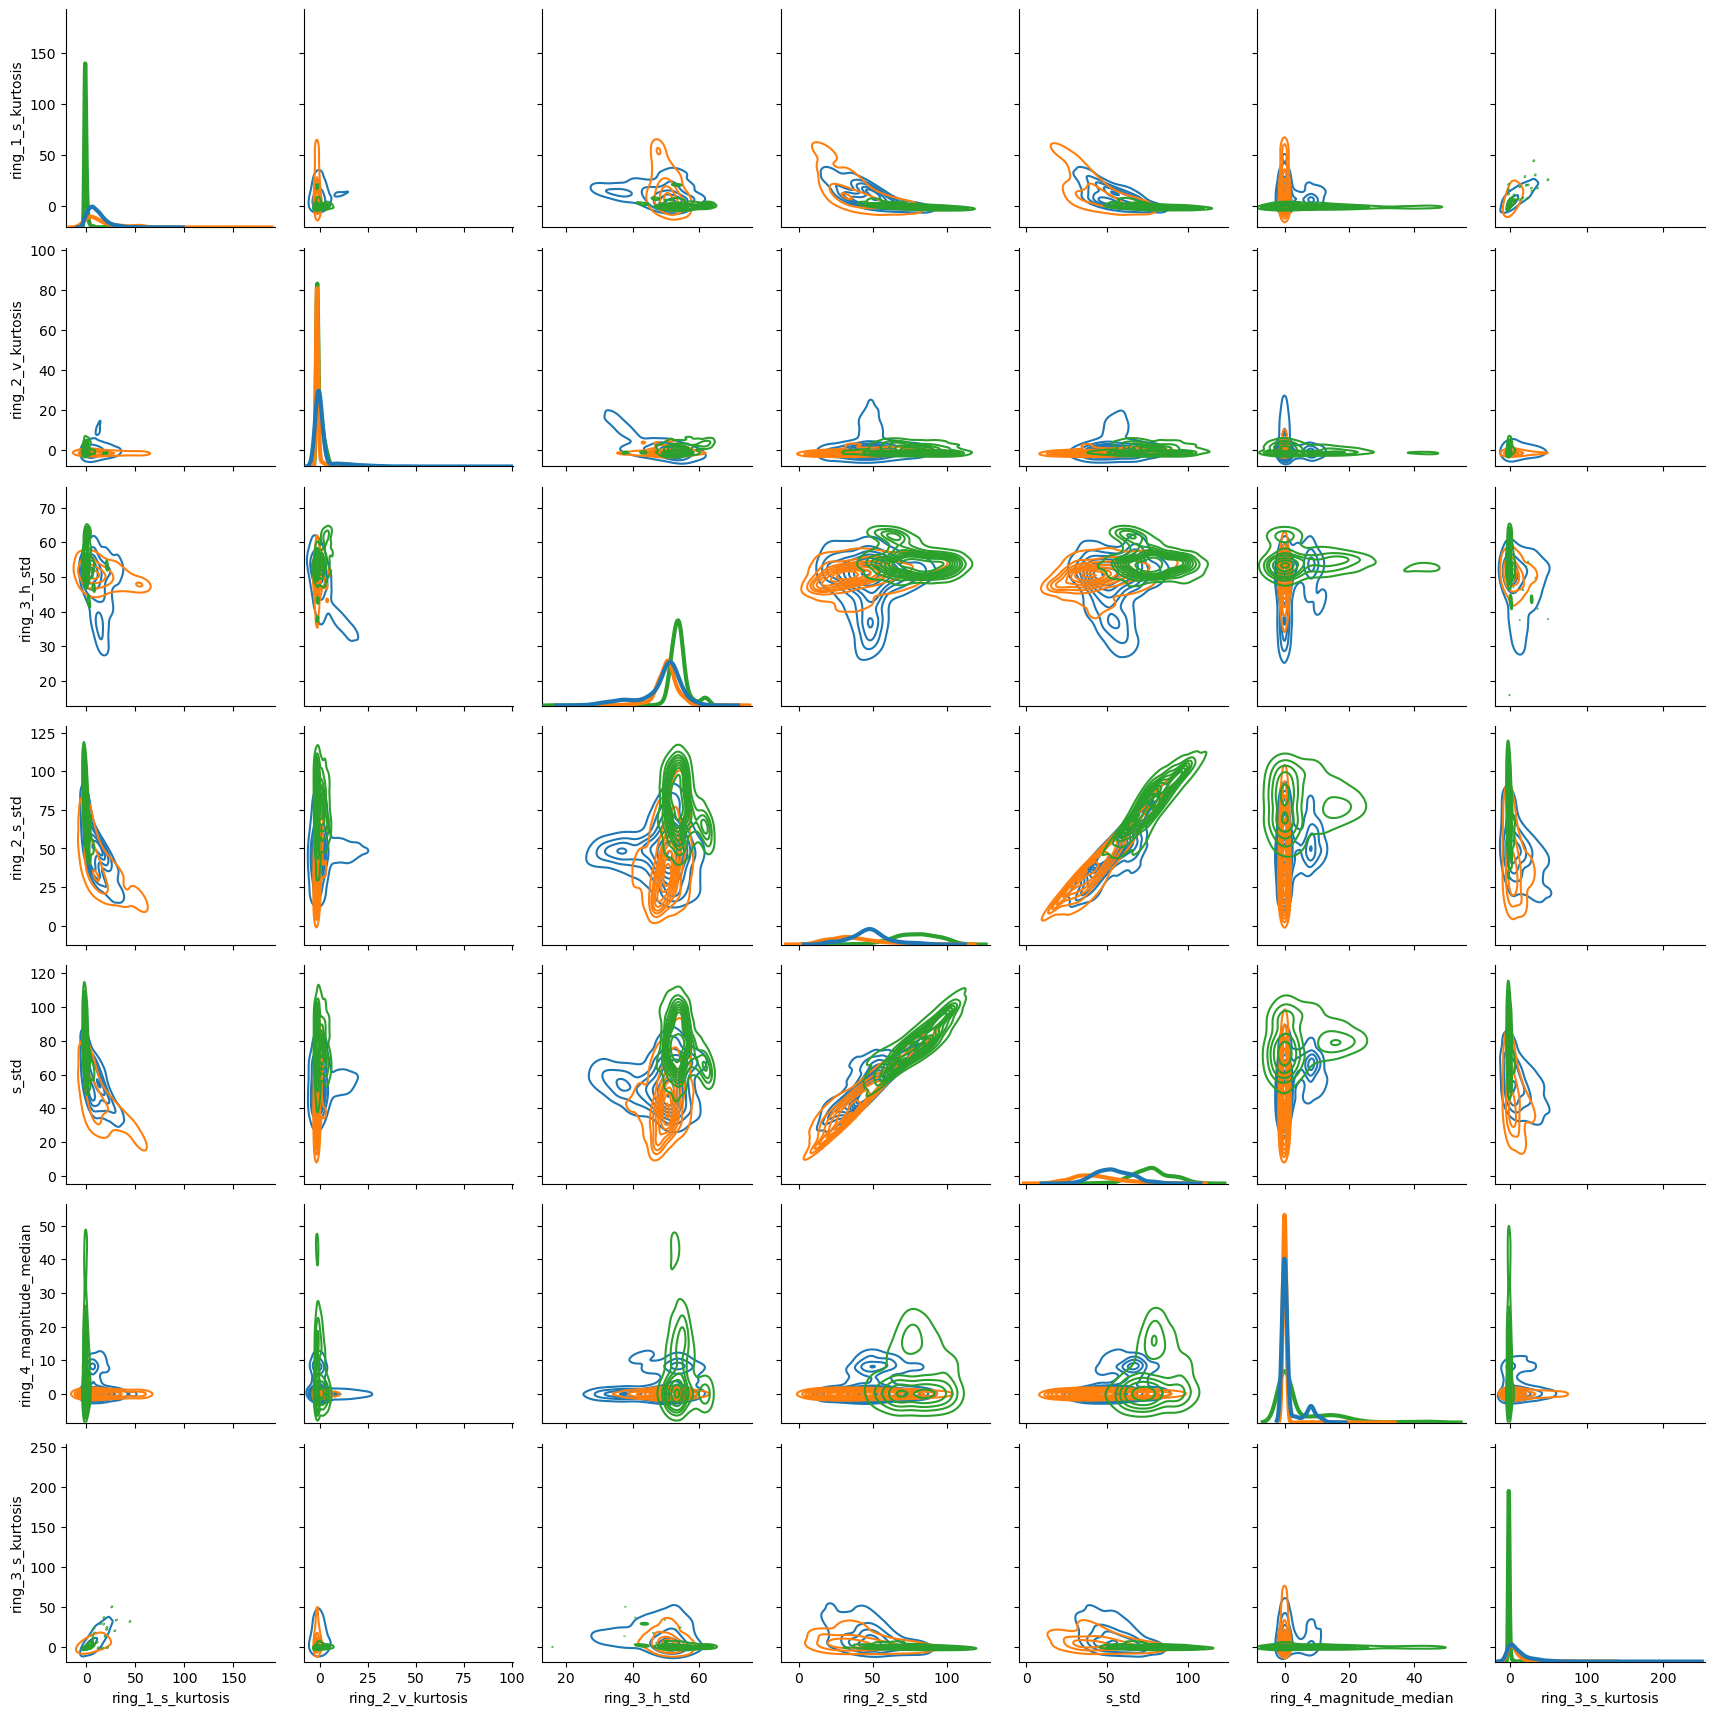

In [16]:
g = sns.PairGrid(df, hue = "img_type", 
                 hue_kws = {"cmap": ["Blues", "Greens", "Reds"]})
g = g.map_diag(sns.kdeplot, lw = 3)
g = g.map_offdiag(sns.kdeplot, lw = 1)

plt.show()

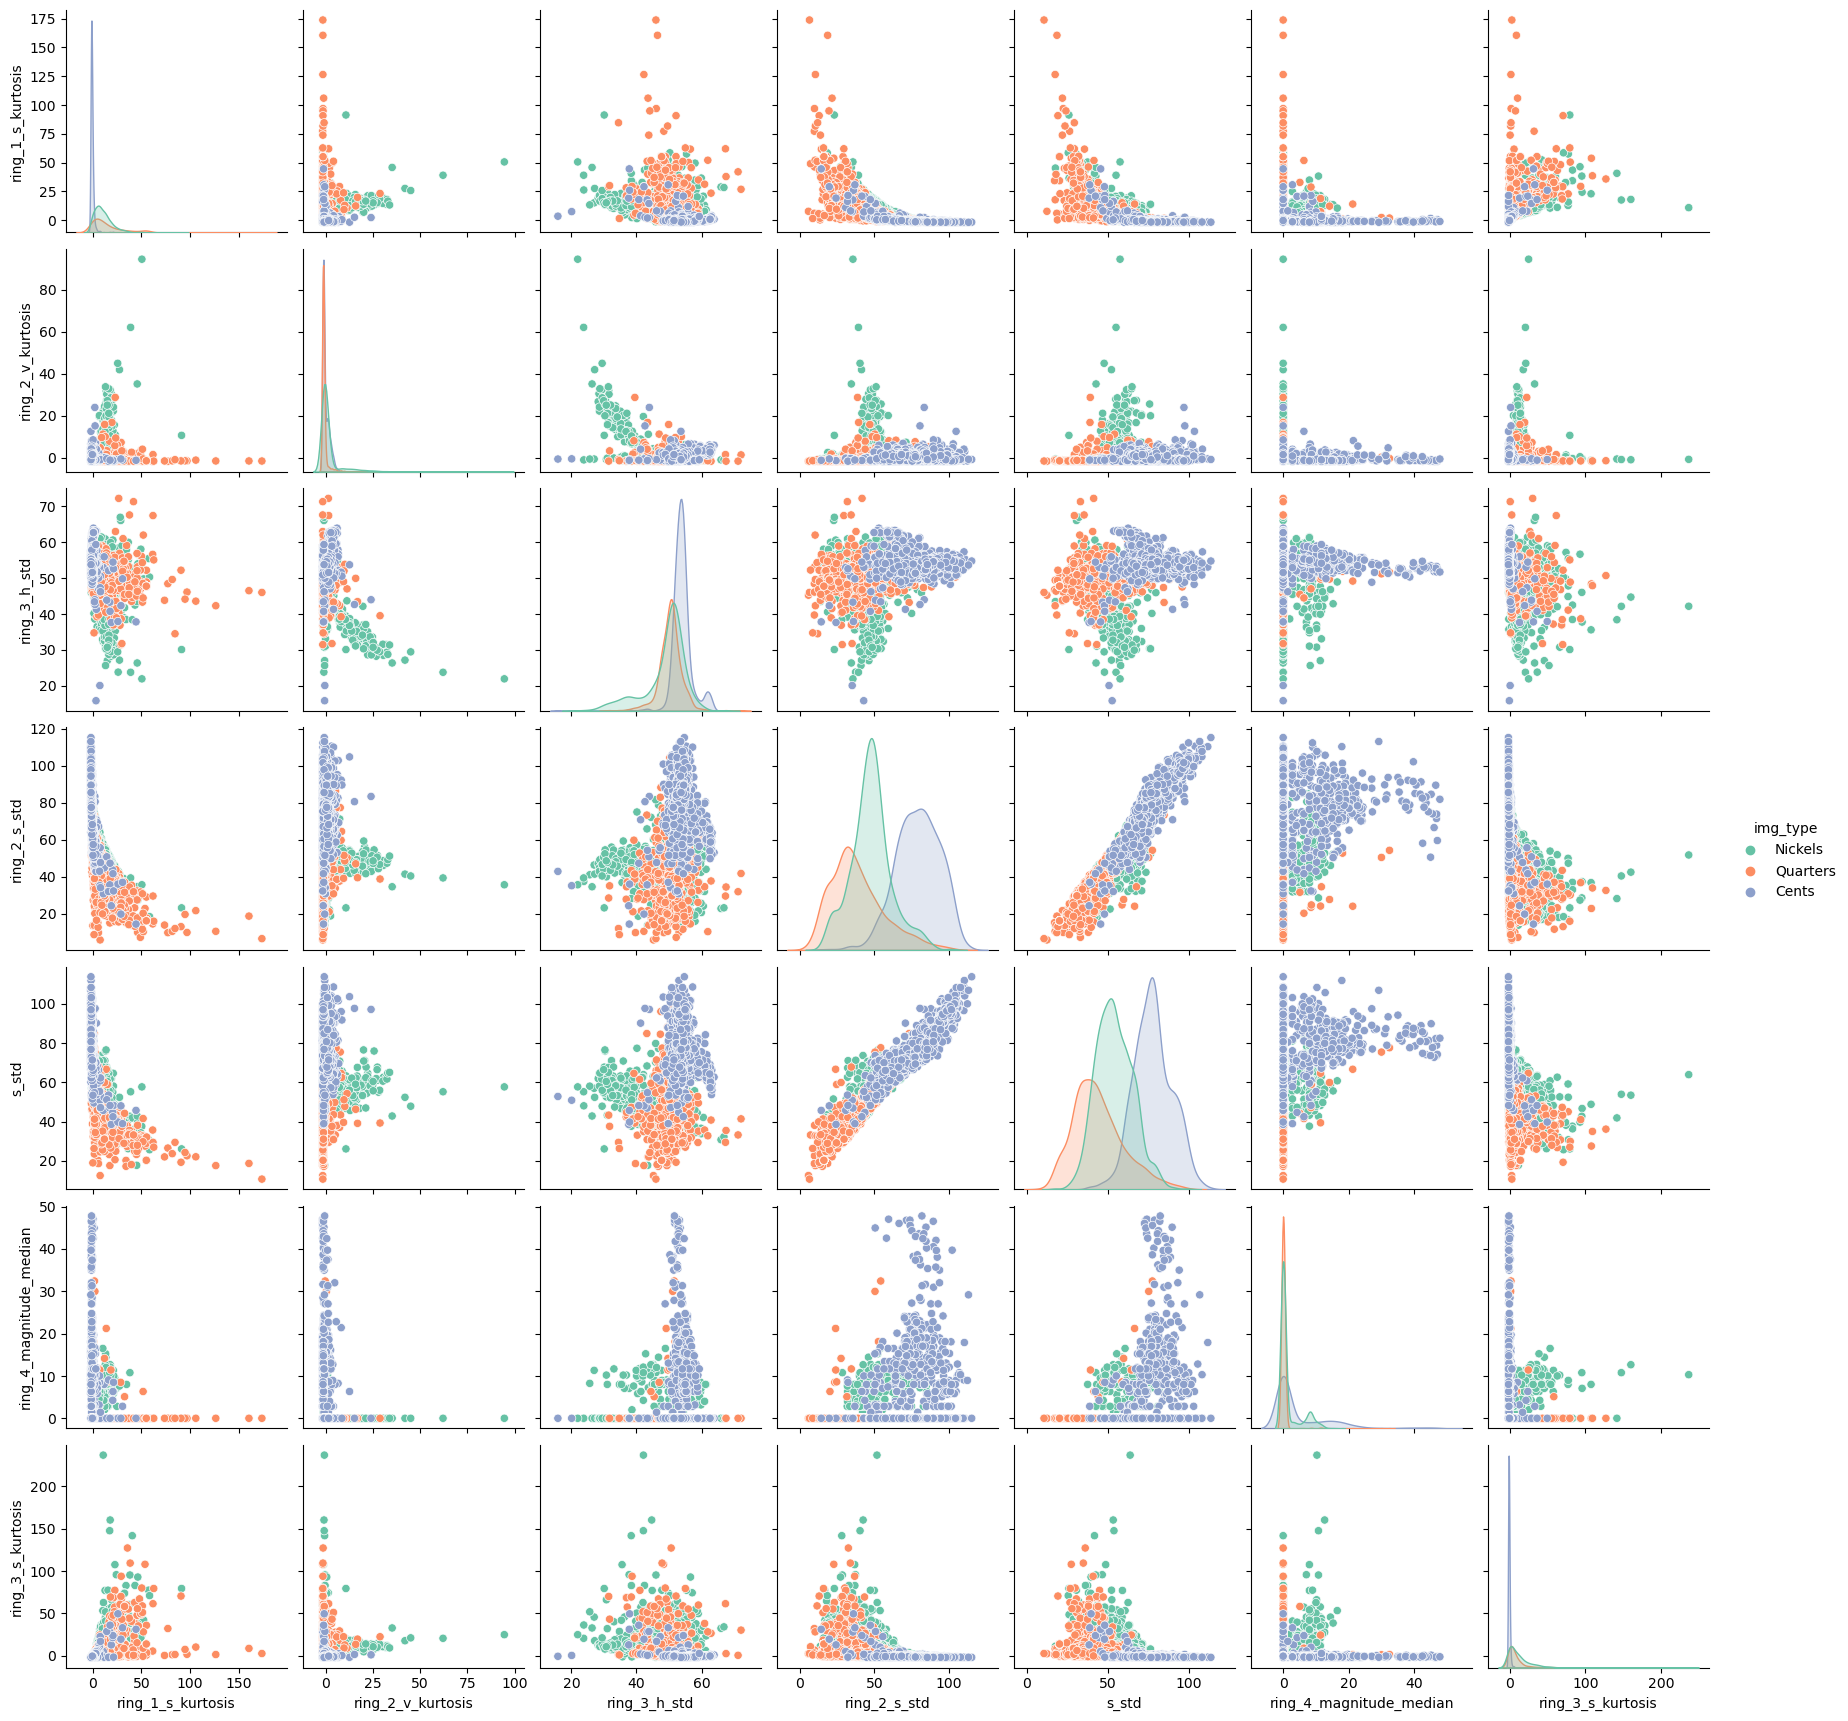

In [17]:
g = sns.pairplot(df, hue = "img_type", 
                 palette = "Set2", 
                 diag_kind = "kde", 
                 height = 2.5)

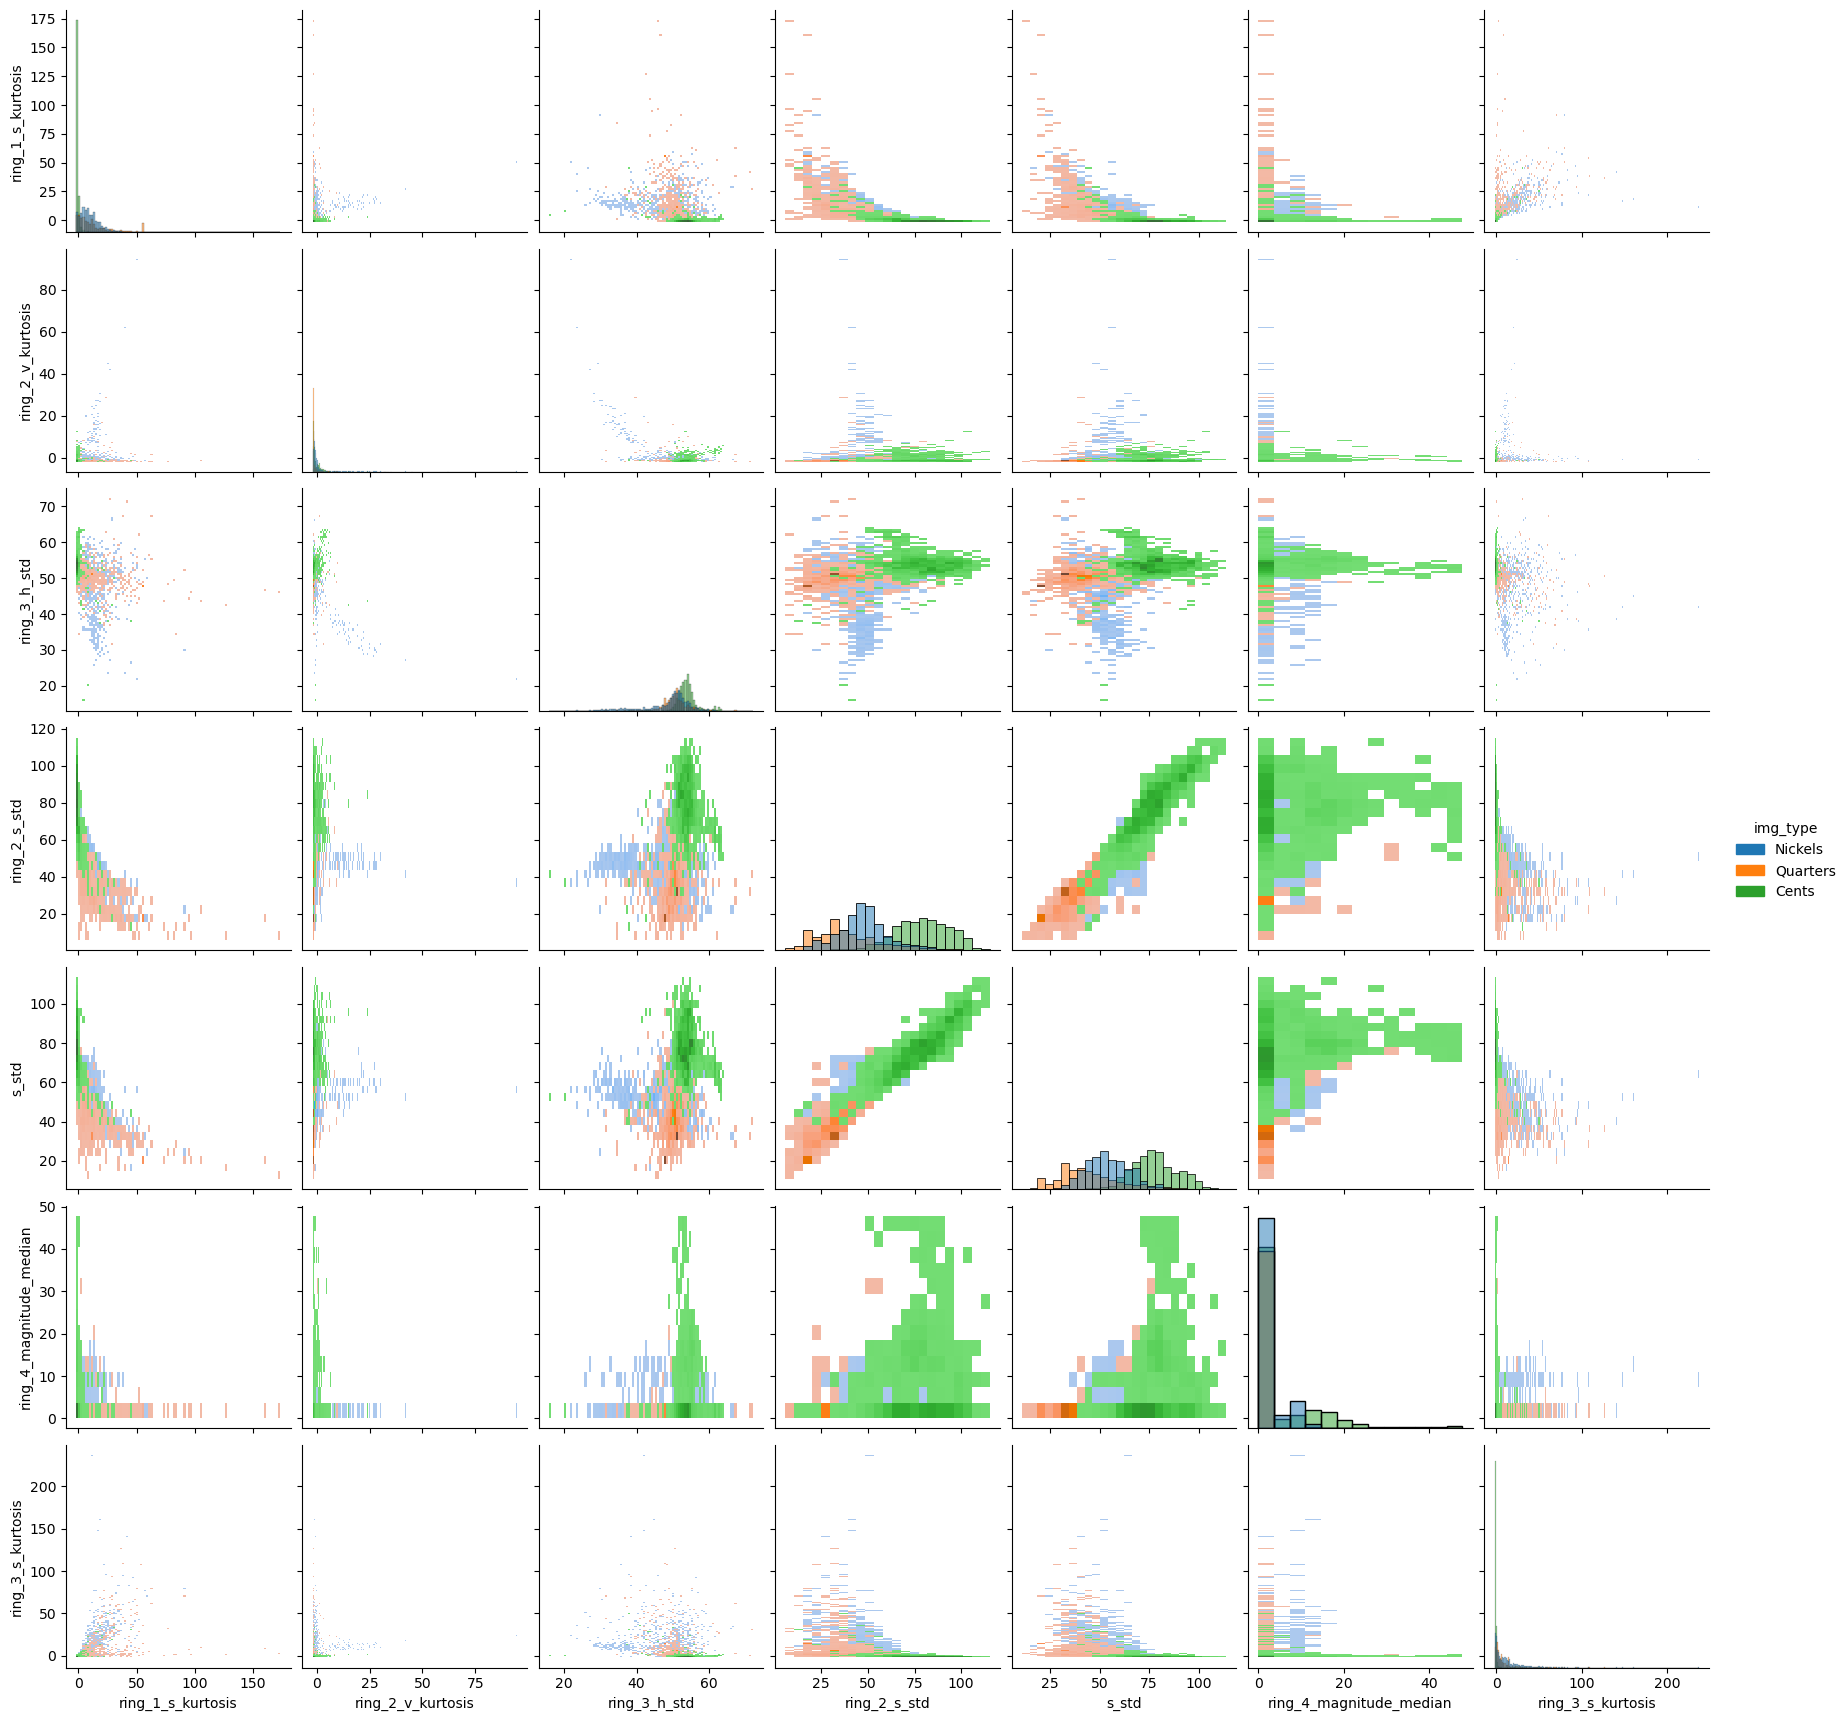

In [18]:
sns.pairplot(df, hue = "img_type", 
             kind = "hist")

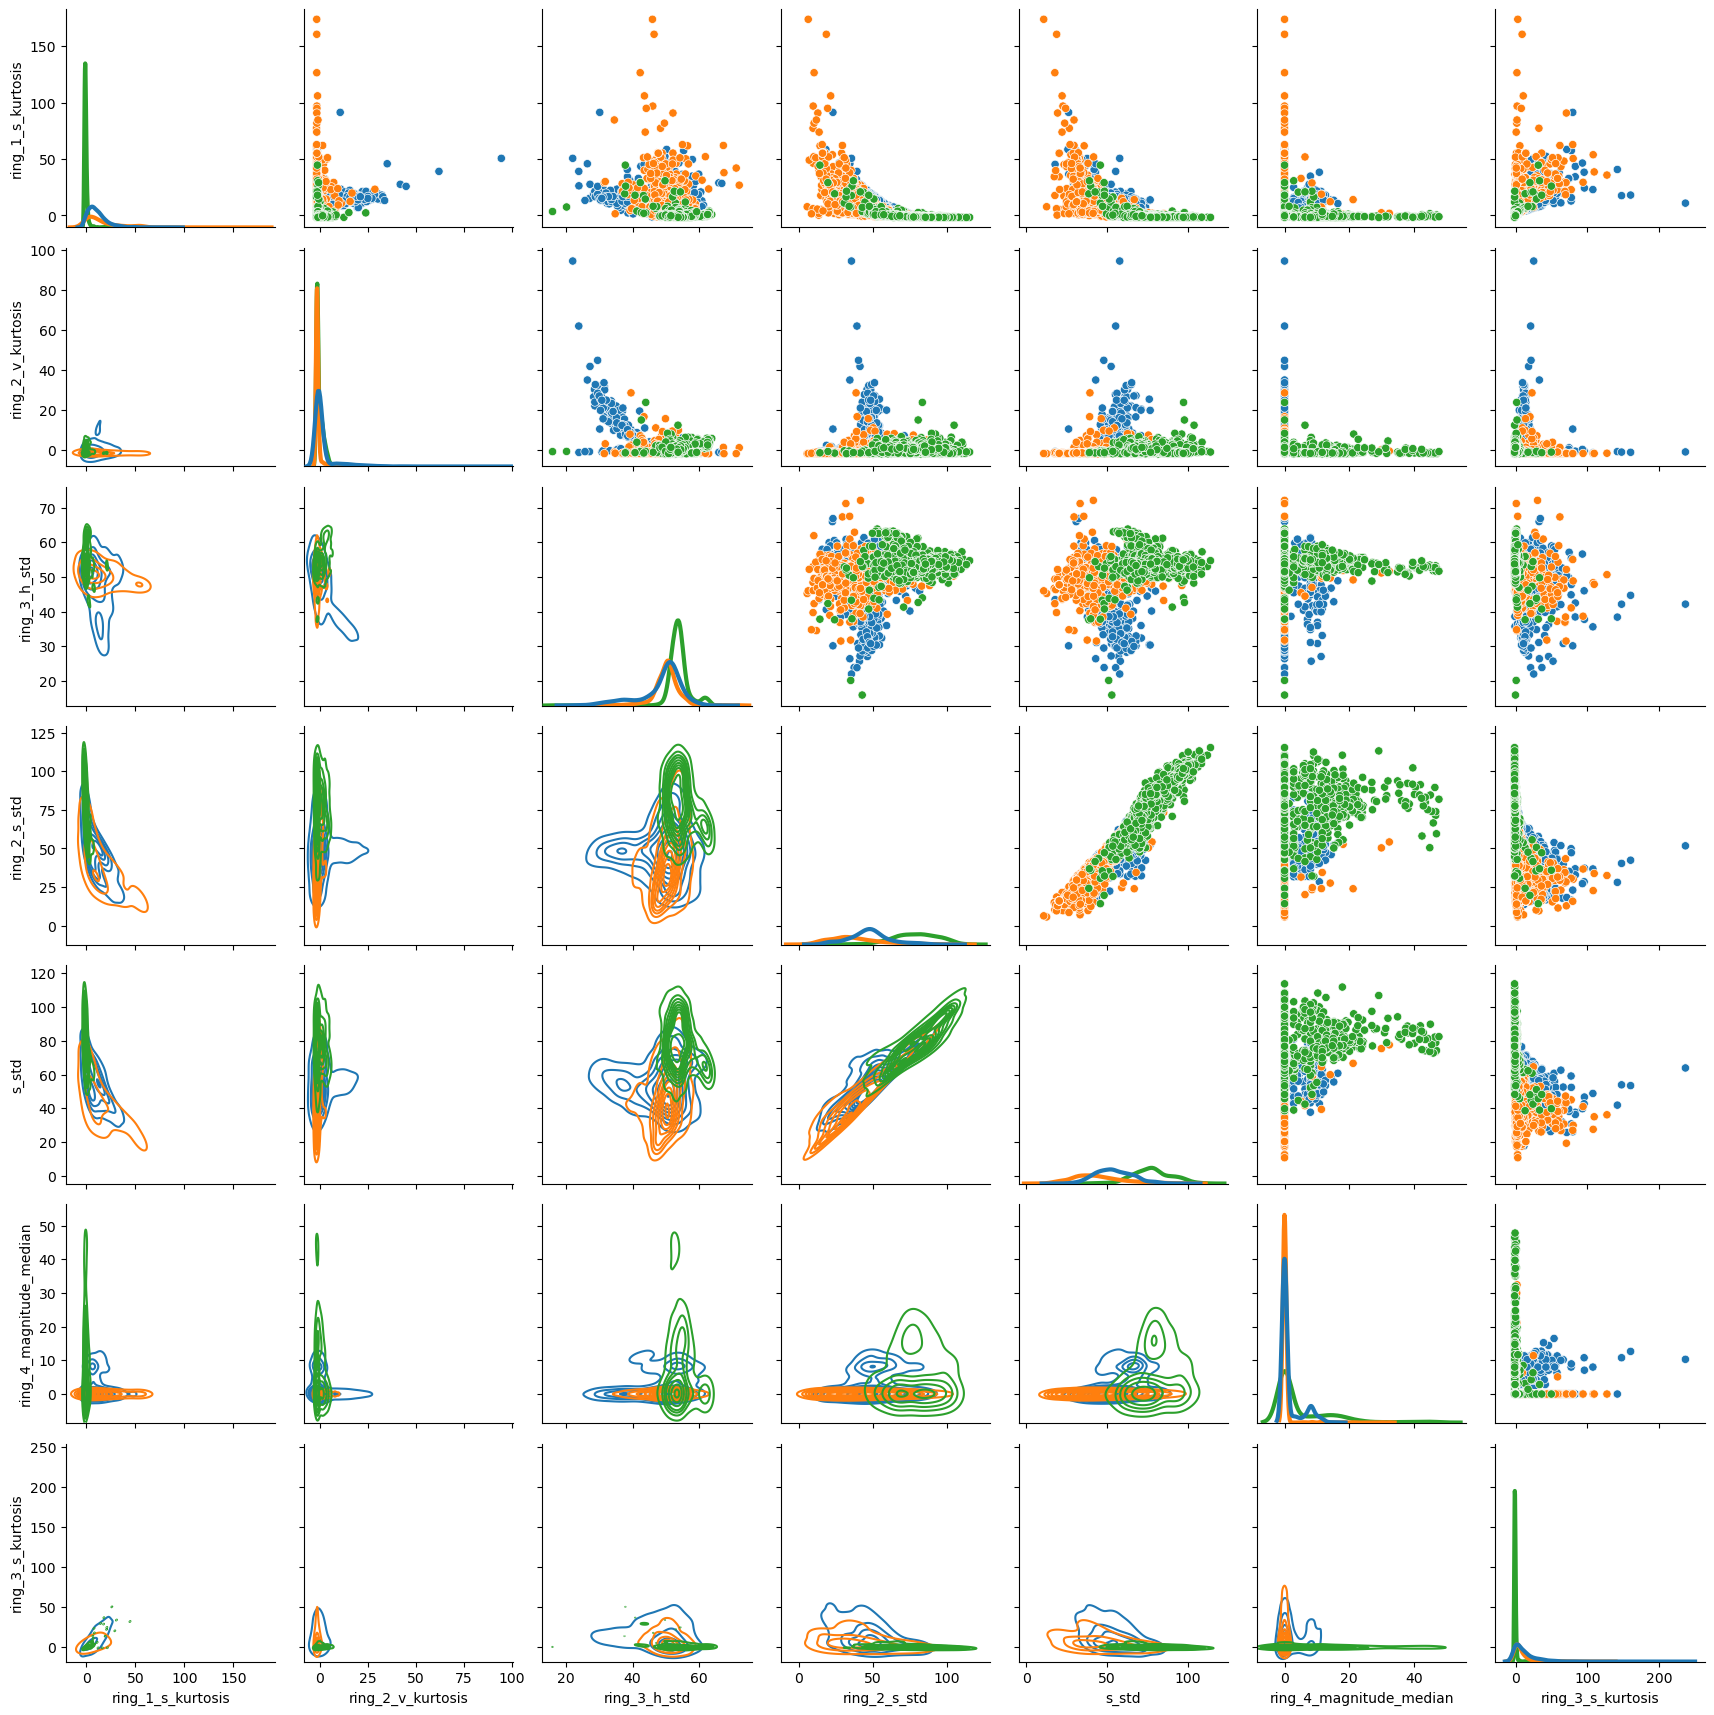

In [19]:
g = sns.PairGrid(df, hue = "img_type")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw = 3)